### LINEAR REGRESSION WITH MULTIPLE VARIABLES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

dataset = pd.read_csv('linear_regression_train.csv')
dataset.head()
split = 0.8
s = int((dataset.values.shape[0])*split)
x_data = dataset.values[:s,1:26]
y_data = dataset.values[:s,26]
x_cv = dataset.values[s:,1:26]
y_cv = dataset.values[s:,26]

dataset = pd.read_csv('linear_regression_test.csv')
x_test = dataset.values[:,1:26]

print(f"x: {x_data} shape: {x_data.shape}, type:{type(x_data)})")
print(f"y: {y_data} shape: {y_data.shape}, type:{type(y_data)})")

x: [[ -10.42983652   21.68425064   93.05632423 ...  -99.42351759
   -41.15065424  113.11719747]
 [  12.47508125   11.65201123  -47.62188868 ...  -97.69430387
    13.81611278    8.71189399]
 [   7.69618811   24.72954661   43.78238349 ... -100.87486091
   -38.8955983    34.4883343 ]
 ...
 [  22.4012425    25.65874334   60.04547014 ... -104.09754548
   -18.10980651   -6.88924878]
 [   5.55894173   17.10852093    4.45349705 ...  -98.54878075
   -45.98647787  -19.20804632]
 [   9.07047177   25.43355012   64.65478309 ... -102.18851553
  -100.99889955  -55.0839879 ]] shape: (38400, 25), type:<class 'numpy.ndarray'>)
y: [ 5235.69092808 -1221.44214589 -1102.75886179 ...  2427.93795728
  1013.63617602 -1773.2025304 ] shape: (38400,), type:<class 'numpy.ndarray'>)


In [ ]:
"""
#feature scaling method 1
x_data/= x_data.max(axis=0)
print(x_data)
"""

'\n#feature scaling method 1\nx_data/= x_data.max(axis=0)\nprint(x_data)\n'

In [ ]:
"""
#feature scaling method 2
x_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))
print(x_data)
"""

'\n#feature scaling method 2\nx_data = (x_data - np.mean(x_data,axis = 0))/(x_data.max(axis=0)-x_data.min(axis=0))\nprint(x_data)\n'

In [ ]:
#feature scaling method 3 (Z-Score)
m = np.mean(x_data, axis = 0)
s = np.std(x_data ,axis = 0)
def f_scale3(x,m,s):
    std=s
    x_f=(x - m)/(std+1e-8)
    return x_f
x_data = f_scale3(x_data,m,s)
x_cv = f_scale3(x_cv,m,s)
x_test = f_scale3(x_test,m,s)
print(x_data)

[[-1.69206312  0.25244802  1.14205408 ... -0.22425525 -0.47590366
   2.26466532]
 [ 0.67471046 -1.49306916 -2.09862087 ...  0.15018497  0.88288557
  -0.2083085 ]
 [ 0.18090567  0.78230145  0.00697551 ... -0.53852601 -0.42015823
   0.40223962]
 ...
 [ 1.70038435  0.94397312  0.38161332 ... -1.23635918  0.0936706
  -0.57784162]
 [-0.03993678 -0.54368677 -0.89900797 ... -0.03484162 -0.59544616
  -0.86962818]
 [ 0.32291091  0.90479157  0.48779383 ... -0.82298195 -1.95536399
  -1.71939597]]


In [ ]:
def cost_fn(x, y, w, b):
    return (np.mean(np.dot(x,w)+b - y)**2)/2

In [ ]:
def gradient(x, y, w, b):
    m,n = x.shape
    djdw = np.dot(x.T,np.dot(x,w)+b - y)/m
    djdb = np.sum((np.dot(x,w)+b - y))/m
    return djdw, djdb

In [ ]:
iterations =500
alpha = 10**(-1.9)
def gradient_descent(x, y, w_inp, b_inp, alpha, iterns, cost_function, gradientt):
    J_all = []
    w = w_inp
    b = b_inp
    for i in range(iterns):
        djdw, djdb = gradientt(x, y, w, b)
        w -= (alpha * djdw)
        b -= (alpha * djdb)
        if i<100000:
          J_all.append(cost_function(x, y, w, b))
        if i% math.ceil(iterns /10) == 0 or i == (iterns-1):
          print(f"Iterations:{i} Cost:{J_all[-1]:8.4f}")
    return w, b, J_all

w_in = np.random.rand(x_data.shape[1],)
b_in = 0
w_f, b_f, J_list = gradient_descent(x_data, y_data, w_in, b_in, alpha, iterations, cost_fn, gradient)
print(f"final (w,b) using gradient descent: {w_f},{b_f:8.4f}")
print(f'Cost using parameters found: {cost_fn(x_data, y_data, w_f, b_f)}')

Iterations:0 Cost:759275.0021
Iterations:50 Cost:213886.8234
Iterations:100 Cost:60251.6520
Iterations:150 Cost:16972.8154
Iterations:200 Cost:4781.2210
Iterations:250 Cost:1346.8640
Iterations:300 Cost:379.4099
Iterations:350 Cost:106.8793
Iterations:400 Cost: 30.1078
Iterations:450 Cost:  8.4813
Iterations:499 Cost:  2.4505
final (w,b) using gradient descent: [ 1.31065102e+02  2.32524110e-01  5.20484752e+02  7.35315827e+02
 -2.39153920e-01  8.08988090e+02  4.41858835e+02 -1.47530831e+00
  6.45869961e+02  2.26050171e+02  1.26328721e+00  7.20910453e-01
  7.59438833e+02  6.61774955e+02 -1.39598479e+00  5.27402185e+02
  3.04669747e+01  4.50719581e+02  4.11877547e+02  6.93472305e+02
  9.62110571e+01  2.46522350e+00  1.05866816e+02  4.92292696e+02
  1.12572960e+00],1245.7923
Cost using parameters found: 2.45048862669813


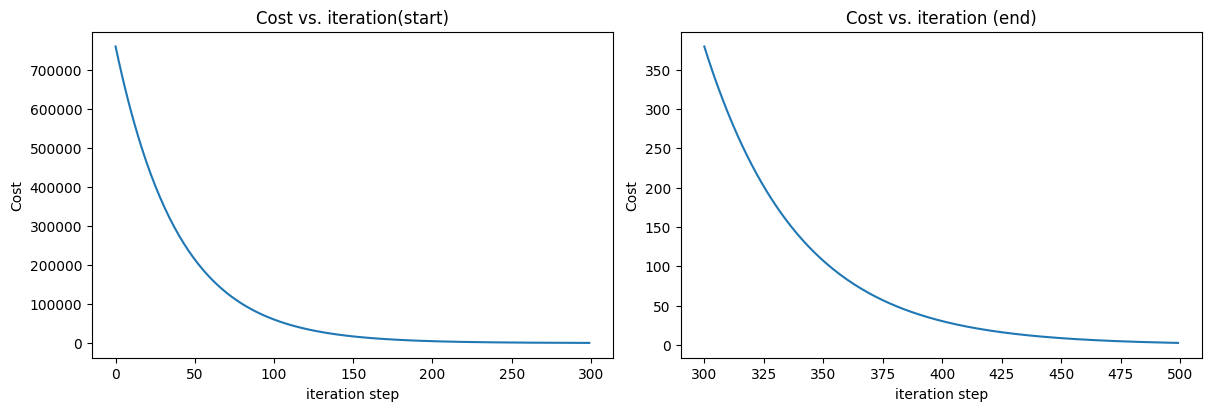

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_list[:300])
ax1.set_title("Cost vs. iteration(start)")
ax1.set_xlabel('iteration step')
ax1.set_ylabel('Cost')
ax2.plot(300 + np.arange(len(J_list[300:])), J_list[300:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_xlabel('iteration step')
ax2.set_ylabel('Cost')
plt.show()

In [ ]:
def mse (pred, targets):
    mse = np.mean((pred - targets)**2)
    print(f"Mean Squared Error: {mse:.4f}")
    return mse

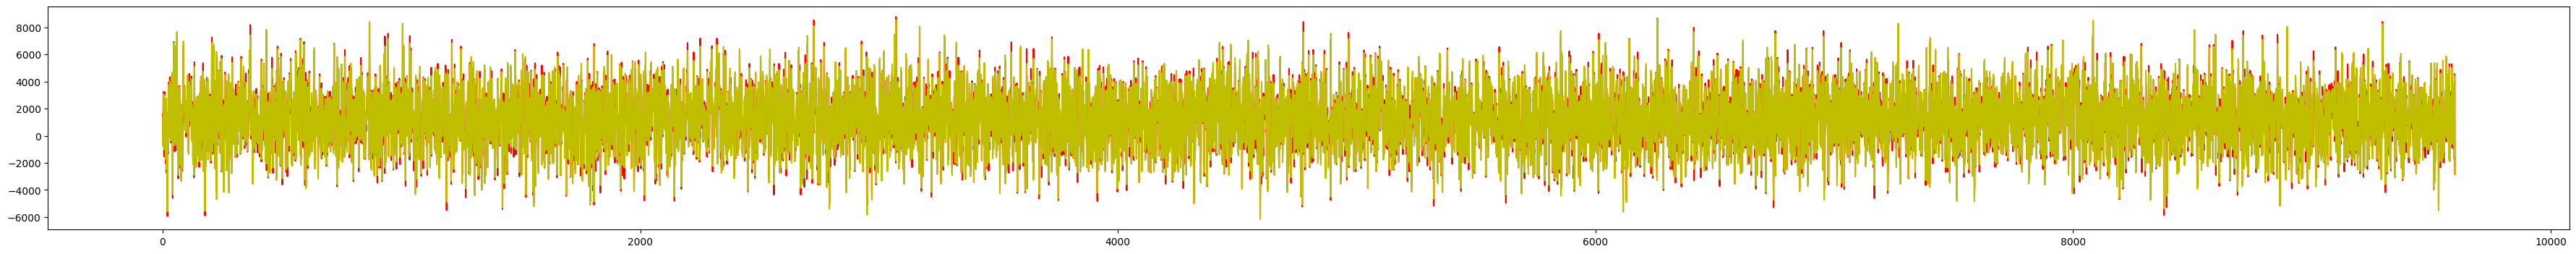

Mean Squared Error: 116742.1734


In [ ]:
y_pred = np.empty(x_cv.shape[0])
for i in range (x_cv.shape[0]):
  y_pred[i] = np.dot(w_f,x_cv[i]) +b_f

fig, ax = plt.subplots(figsize = (45,4))
ax.plot(y_cv,c='r')
ax.plot(y_pred,c='y')
plt.show()

error = mse(y_pred,y_cv)

In [ ]:
x_test = f_scale3(x_test,m,s)
y_test_pred = np.empty(x_test.shape[0])
for i in range (x_test.shape[0]):
  y_test_pred[i] = np.dot(w_f,x_test[i]) +b_f
print("Predictions for x_test:", y_test_pred)

"""
accuracy_f = mse(y_test_pred,y_test)
"""

Predictions for x_test: [6946.90545599 7085.21735864 7200.65116487 ... 7147.81135704 6999.91103003
 6980.50188889]


'\naccuracy_f = mse(y_test_pred,y_test)\n'

In [ ]:
y_mean = np.mean(y_cv)
baseline_predictions = np.full_like(y_cv,y_mean)
baseline_mse = mse(y_cv,baseline_predictions)

Mean Squared Error: 4654904.3189


In [ ]:
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Predicted"])
y_test_pred_df.to_csv("y_test_pred.csv", index=False)

print("Predictions saved to 'y_test_pred.csv'.")

Predictions saved to 'y_test_pred.csv'.
